In [2]:
library(ggplot2)

# Лабораторна робота з випадкових процесів №2
                                            Виконала Неділько Дарина КМ-91

## Завдання 1
Змоделювати Пуассонівський потік з заданою інтенсивністю. 
Побудувати графіки реалізацій процесу. 
Побудувати гістограми розподілів:
- часу появи заданої події (перша, друга, n - та)
- інтервалу між подіями
- появи рівно n - подій

Спочатку змоделюємо Пyассонівський потік. Для цього використаємо формулу
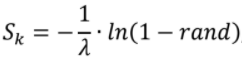
де:
   -  rand - рівномірно розподілена на [0,1] величина
   -  lambda - інтенсивність Пуассонівського потоку
   
Визначаємо кількість подій n та щільність lambda, генеруємо Пуассонівський потік за формулою та виводимо.

Enter the amount of events 100
Enter lambda(intensivity) 2.5


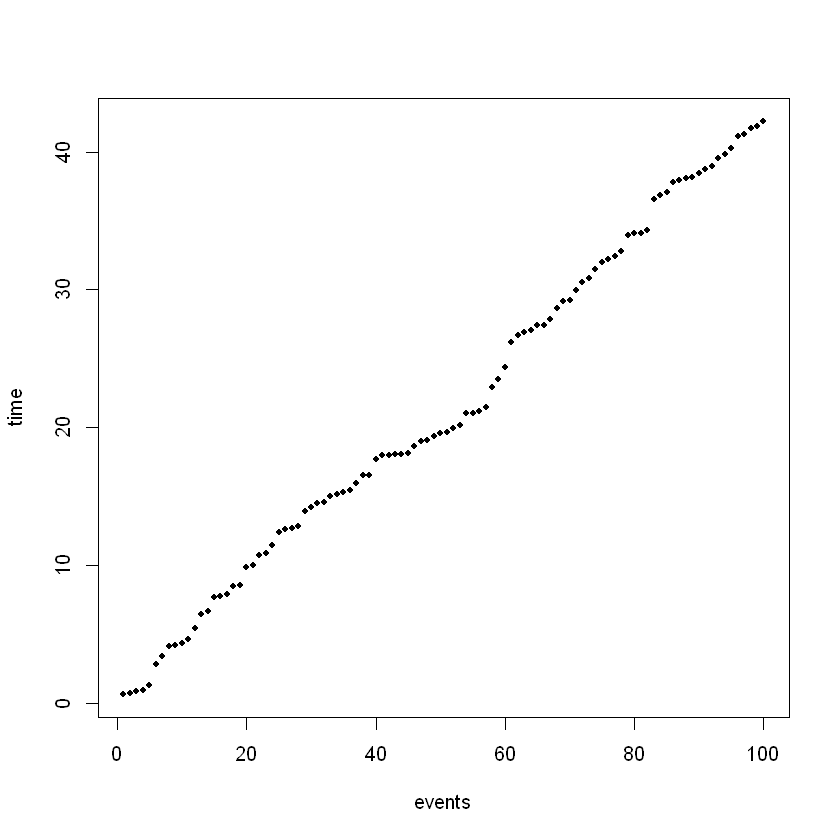

In [9]:
n <- as.numeric(unlist(readline('Enter the amount of events ')))
events <- 1:n
rand <- runif(n)
l <- as.numeric(unlist(readline('Enter lambda(intensivity) ')))
Sk <- -log(1-rand)/l
time <- sapply(events,function(k) sum(Sk[1:k]))
plot(events,time, pch=20)

Тепер дізнаємося довжину пуассонівського процесу за формулою: 
Частота n подій обраховується за формулою: 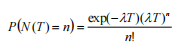

Будуємо графік для n подій

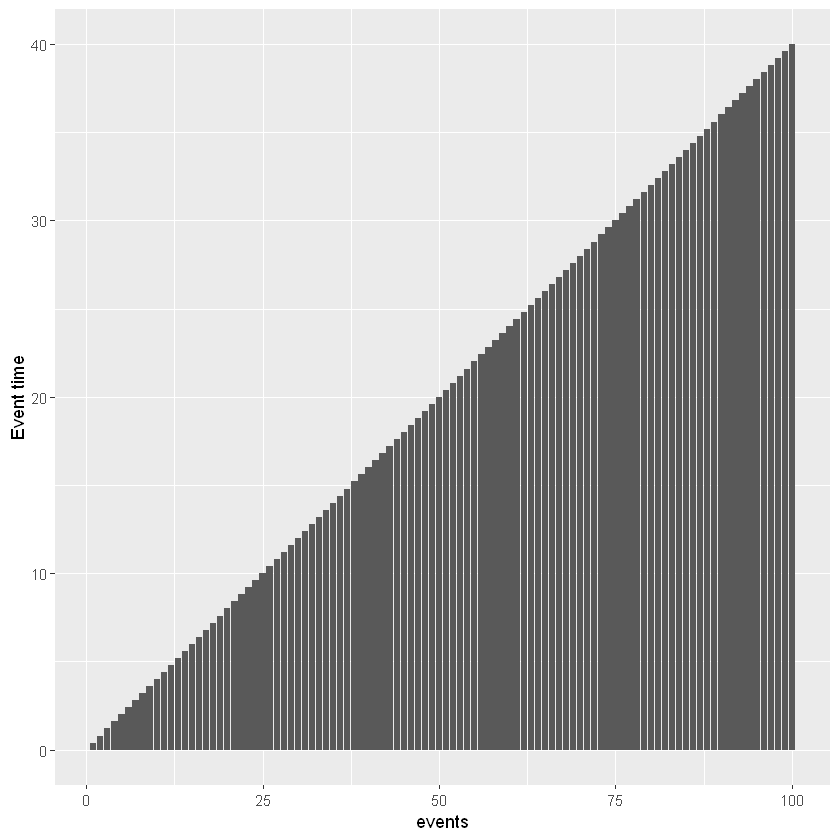

In [10]:
T <- n/l
Ts <- sapply(events, function(k) k/l)
df_1 <- data.frame(events,Ts)
ggplot(df_1, aes(x = events, y = Ts)) +
       geom_bar(stat="identity") +ylab('Event time')

Інтервали між подіями

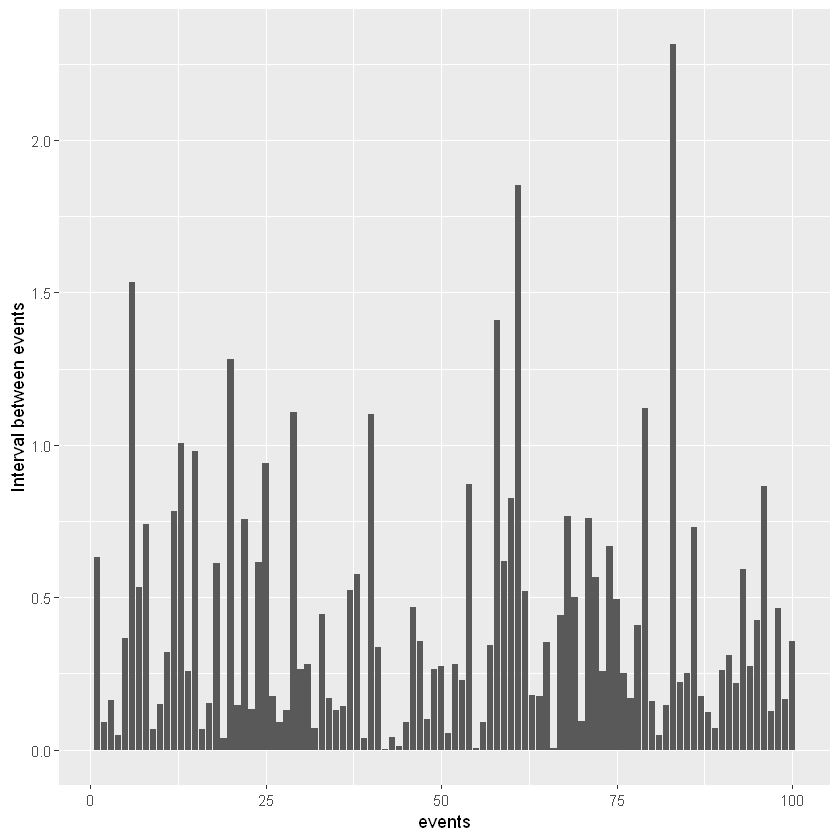

In [11]:
df_2 <- data.frame(events,Sk)
ggplot(df_2, aes(x = events, y = Sk)) +
       geom_bar(stat="identity") + ylab('Interval between events')

Змоделюємо тепер Пуассонівський процей дрвжиною T вказану кількість разів та визначимо частоту виконання n подій

Frequensy of n events aproximately equal  0.039861
How many times do you wanna model Poisson prosses? 1100

Frequency of n events amount 1100 Poisson prosses models is  119

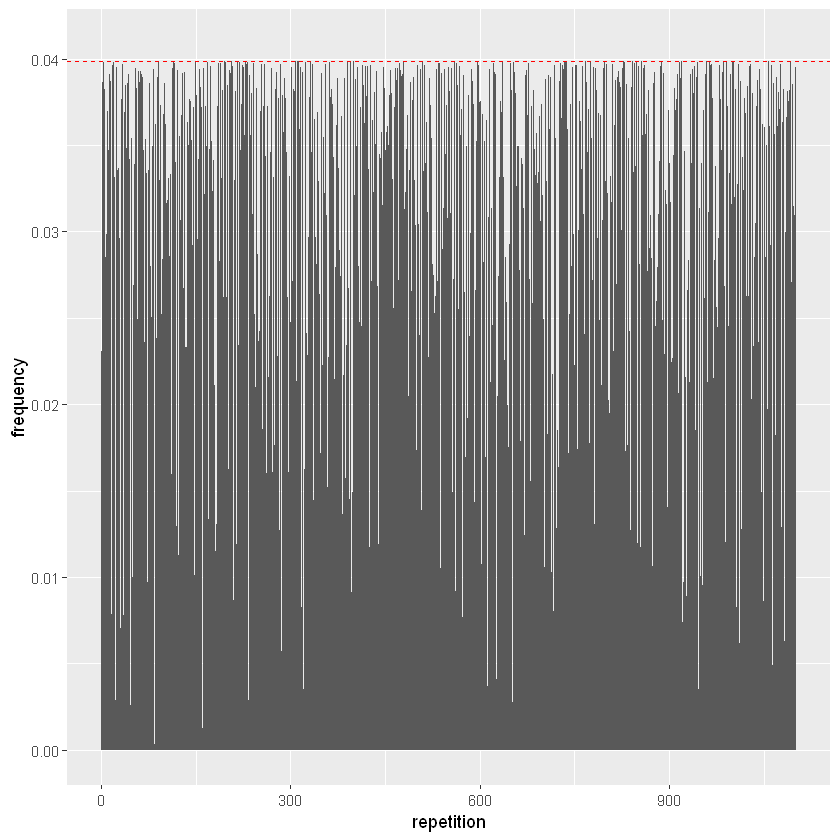

In [12]:
Pn <- exp(-l*T)*((l*T)^n)/factorial(n)
cat('Frequensy of n events aproximately equal ',Pn)
re <- as.numeric(unlist(readline("\nHow many times do you wanna model Poisson prosses? ")))
repetition <- 1:re
ffreq <- sapply(repetition, function(i) sum(sapply(runif(n),function(k) -log(1-k)/l)))*l
frequency <- sapply(ffreq, function(e) exp(-e)*(e^n)/factorial(n))

df_3 <- data.frame(repetition,frequency)
ggplot(df_3, aes(x = repetition, y = frequency)) + ylim(0,max(frequency)+0.001) + geom_bar(stat="identity") +
  geom_hline(yintercept=Pn, linetype="dashed", color = "red")

custom <- function(x){
  if (round(x,3)==round(Pn,3)){
    return (1)
  }else{
    return (0)
  }

}

events_n <- sum(sapply(frequency, function(i) custom(i)))
cat('\nFrequency of n events amount 1100 Poisson prosses models is ', events_n)


## Завдання 2
1. Змоделювати неперервний вінерівський випадковий процес.
2. За реалізаціями (кількість реалізацій > 100) оцінити середнє значення та дисперсію.
3. Знайти емпіричний закон розподілу ймовірностей часу першого виходу вінерівського процесу за заданий рівень.

Моделювання Вінерівського процесу буде відбуватися за двома формулами: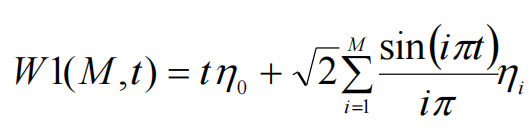 та 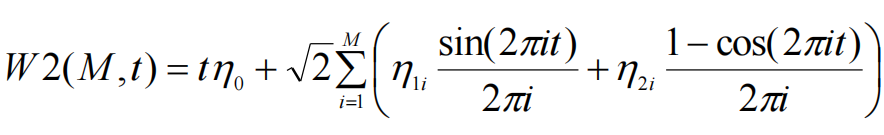
де:
- {іta 1i, ita 2i} та {ita 0, ita 1...ita n} - незалежні гауссові випадкові величини

Спочаку напишемо ці функції, для полегшення подального обрахування

In [13]:
W1 <- function (M,t){
  mu <- runif(M+1)
  t <- runif(1)
  value <- t*mu[1] + sqrt(2) * sum(sapply(1:M,function(i) sin(i*pi*t)*mu[i+1]/(pi*i)))
  return (value)
}

W2 <- function(M,t){
  mu0 <- runif(1)
  mu1 <- runif(M)
  mu2 <- runif(M)
  t <- runif(1)
  value <- sapply(1:M, function(i) t*mu0 + sqrt(2) * sum(mu1[i]*sin(2*pi*i*t)/(2*pi*i)+mu2[i]*(1-cos(2*pi*i*t))/(2*pi*i)))
  return (value)
}

Вінерівський процес буде моделюватися для поданої кількості подій перший раз M=1000, другий M=10000 і третій M=100000. На графіку червоним зображено моделювання за формулою W1, а синім за формулою W2. 


Enter the amount of events in Wiener process 100


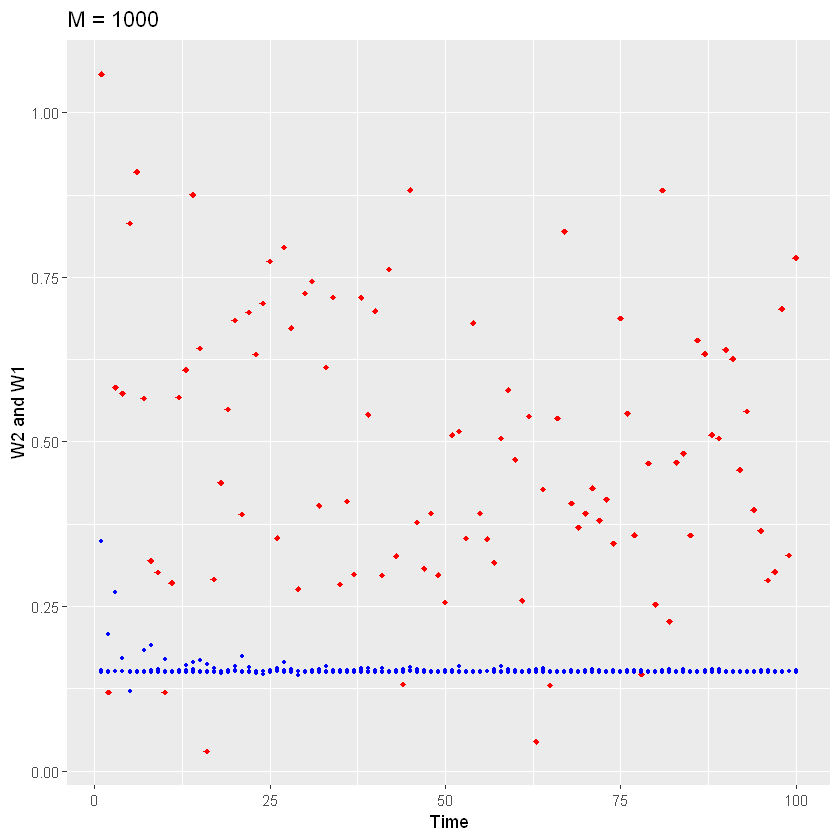

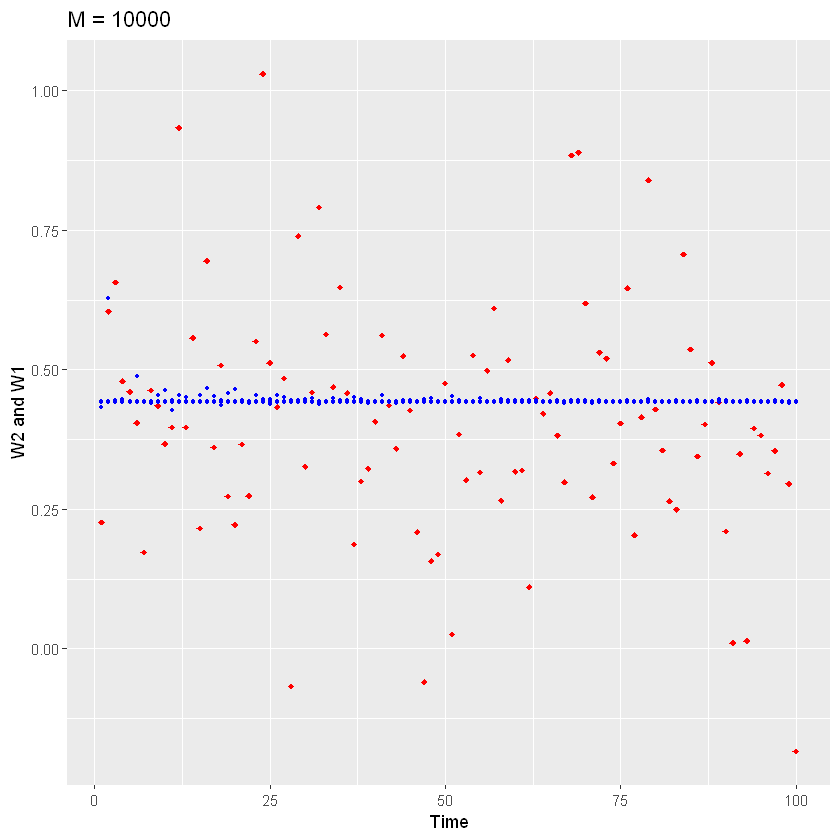

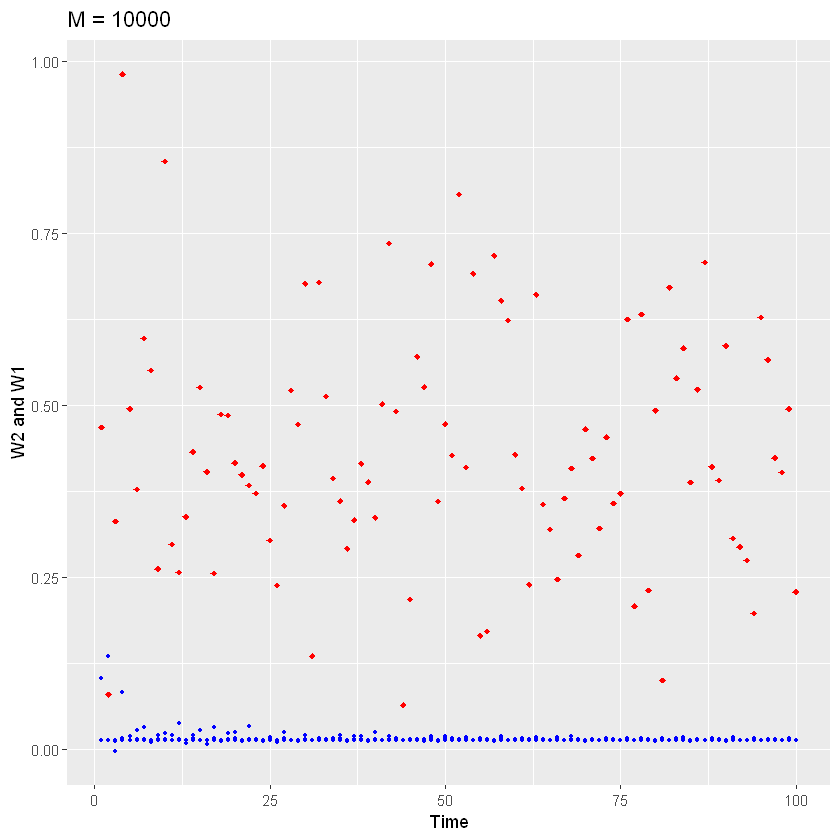

In [23]:
Time <- as.numeric(unlist(readline("\nEnter the amount of events in Wiener process ")))
M1 <- 1000
M2 <- 10000
M3 <- 100000
t <- 1:Time
m1_w1 <- sapply(t,function(i) W1(M1,i))
m1_w2 <-sapply(t,function(i) W2(M1,i))
m2_w1 <- sapply(t,function(i) W1(M2,i))
m2_w2 <-sapply(t,function(i) W2(M2,i))
m3_w1 <-sapply(t,function(i) W1(M3,i))
m3_w2 <-sapply(t,function(i) W2(M3,i))
df_m1_w1 <- data.frame(t, m1_w1)
colnam1 <- c('Time', 'W1')
df_m1_w2 <- data.frame(t, m1_w2)
colnam2 <- c('Time', 'W2')
colnames(df_m1_w1)= colnam1
colnames(df_m1_w2)= colnam2
df_m2_w1 <- data.frame(t, m2_w1)
df_m2_w2 <- data.frame(t, m2_w2)
colnames(df_m2_w1)= colnam1
colnames(df_m2_w2)= colnam2

df_m3_w1 <- data.frame(t, m3_w1)
df_m3_w2 <- data.frame(t, m3_w2)
colnames(df_m3_w1)= colnam1
colnames(df_m3_w2)= colnam2
               
ggplot() + geom_point(data=df_m1_w1, aes(x=Time, y=W1),color='red',shape=18) +
               geom_point(data=df_m1_w2, aes(x=Time, y=W2),color='blue',shape=20)+ ylab('W2 and W1') + labs(title="M = 1000")

ggplot() + geom_point(data=df_m2_w1, aes(x=Time, y=W1),color='red',shape=18) +
               geom_point(data=df_m2_w2, aes(x=Time, y=W2),color='blue',shape=20)+ ylab('W2 and W1') + labs(title="M = 10000")

ggplot() + geom_point(data=df_m3_w1, aes(x=Time, y=W1),color='red',shape=18) +
               geom_point(data=df_m3_w2, aes(x=Time, y=W2),color='blue',shape=20)+ ylab('W2 and W1') + labs(title="M = 10000")



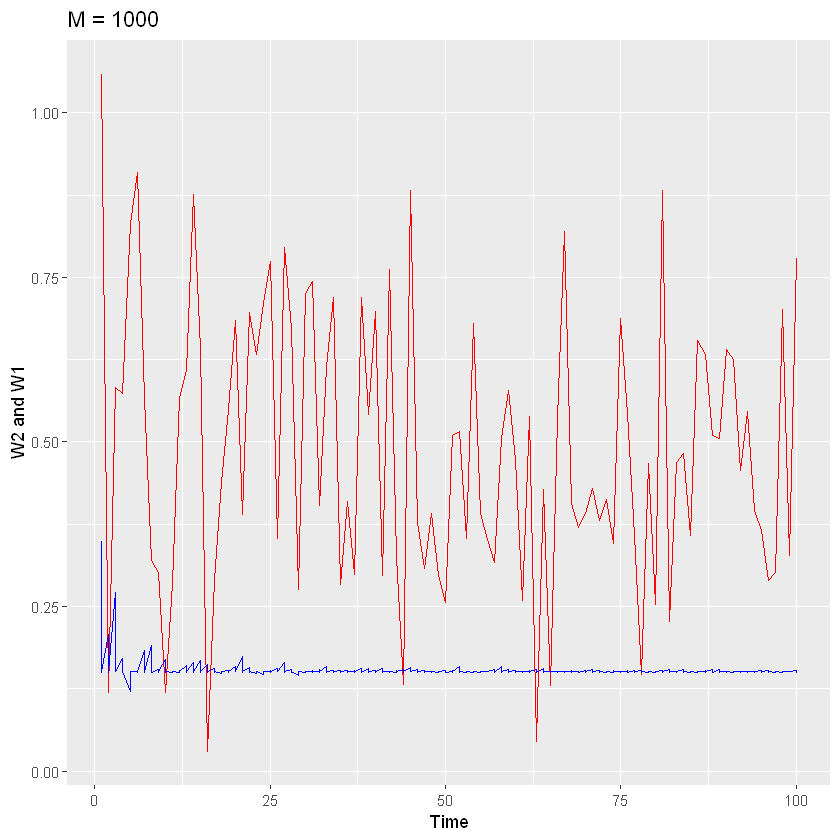

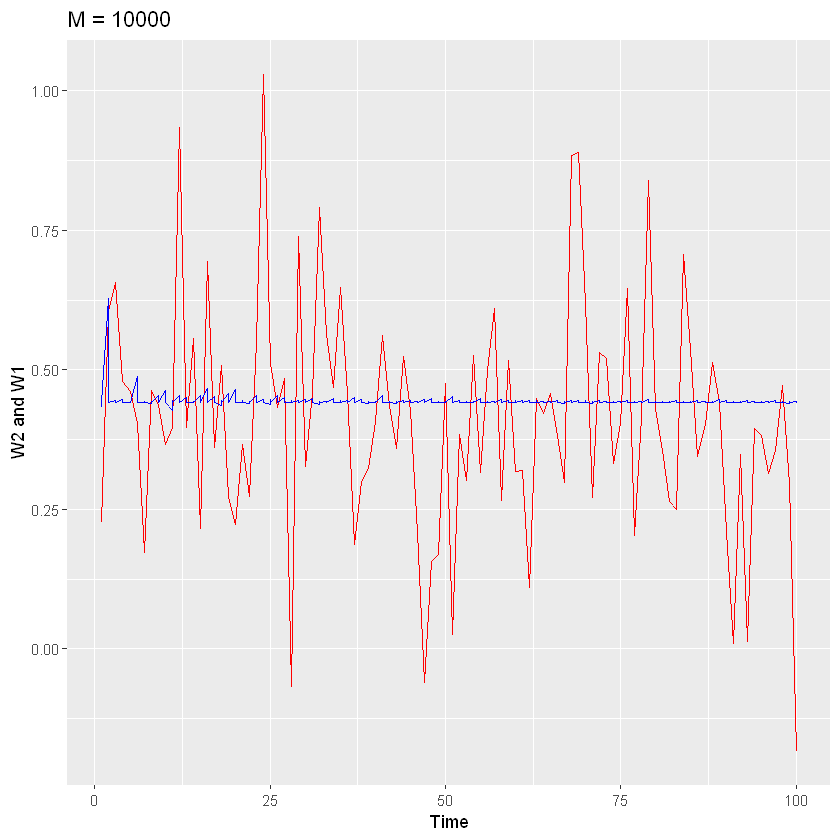

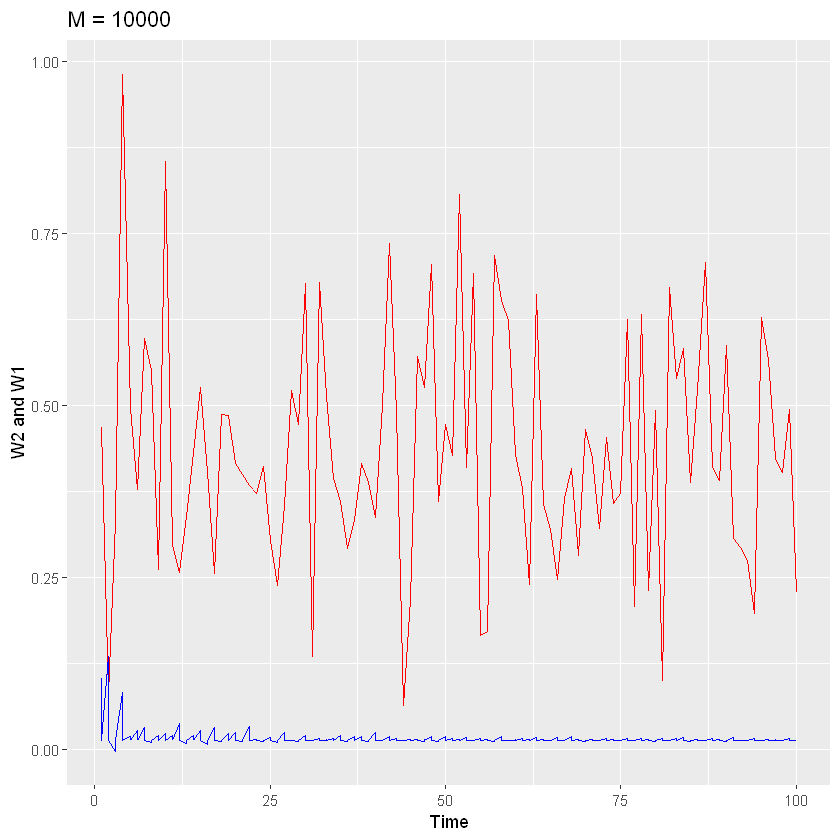

In [24]:
ggplot() + geom_line(data=df_m1_w1, aes(x=Time, y=W1),color='red') + 
               geom_line(data=df_m1_w2, aes(x=Time, y=W2),color='blue')+ ylab('W2 and W1') + labs(title="M = 1000")
               
ggplot() + geom_line(data=df_m2_w1, aes(x=Time, y=W1),color='red') + 
               geom_line(data=df_m2_w2, aes(x=Time, y=W2),color='blue')+ ylab('W2 and W1') + labs(title="M = 10000")
               
ggplot() + geom_line(data=df_m3_w1, aes(x=Time, y=W1),color='red') + 
               geom_line(data=df_m3_w2, aes(x=Time, y=W2),color='blue')+ ylab('W2 and W1') + labs(title="M = 10000")

Тепер знаходимо математичне подівання для вибірки та дисперсію

In [25]:
mean_W1 <- c(mean(m1_w1), mean(m2_w1),mean(m2_w1))
mean_W2 <- c(mean(m1_w2), mean(m2_w2),mean(m2_w2))
variance_W1 <- c(var(m1_w1), var(m2_w1),var(m2_w1))
variance_W2 <- c(var(m1_w2), var(m2_w2),var(m2_w2))
MS <- as.integer(c(M1,M2,M3))
mean_M <- table(c(MS,mean_W1,mean_W2))
# var_M <- matrix(c(MS,variance_W1,variance_W2),3,3)
# cat("\n Table of mean values\n M  W1  W2\n")
for (i in 1:3){
  cat("\nFor function W1 where M=",MS[i],"\n mean of distibution is ", mean_W1[i],"\n  variance is ", variance_W1[i])
  cat("\nFor function W2 where M=",MS[i],"\n mean of distibution is ", mean_W2[i],"\n  variance is ", variance_W2[i])
}


For function W1 where M= 1000 
 mean of distibution is  0.4861576 
  variance is  0.04408225
For function W2 where M= 1000 
 mean of distibution is  0.2423484 
  variance is  6.310984e-05
For function W1 where M= 10000 
 mean of distibution is  0.409571 
  variance is  0.04373579
For function W2 where M= 10000 
 mean of distibution is  0.2283016 
  variance is  2.166526e-05
For function W1 where M= 100000 
 mean of distibution is  0.409571 
  variance is  0.04373579
For function W2 where M= 100000 
 mean of distibution is  0.2283016 
  variance is  -1.379458e-05

# Дякую за увагу!